In [7]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline

### Exponentially-weighted function to mimic pandas.EWM function
This function implements the exponent_weighting function which returns a sequence of $w_j$ as np.array. See below:

It defines a sequence of $X_j$ where $j \subset [0, N]$, an integer taking all values in the interval from 0 to N  $$ X_j =  e^{-\frac{log(2)}{H} \times  \space j}$$
where H is half-life which determines the speed of decay, and $log$ is natural log function
Then a sequence of exponentially decaying weights $w_j$ is defined as $$ w_j = \frac{X_j}{ \sum\limits_{i=0}^j X_i } $$
As per: https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#stats-moments-exponentially-weighted (not exact but similar enough)

In [8]:
#Exponent weighting function, to take the place of Pandas EWM
def exponent_weighting(n_periods, half_life = 252):
    """
    Calculates exponentially smoothed normalized (in probability density function sense) weights
    Arguments:
    n_periods -- number of periods, an integer, N in the formula above
    half_life -- half-life, which determines the speed of decay, h in the formula
    
    Returns:
    exp_probs -- exponentially smoothed weights, np.array
    """
    arr=np.linspace(0, n_periods, num=n_periods+1, endpoint=True, retstep=False, dtype=None, axis=0)
    num=np.exp(arr*(-1*np.log(2)/half_life))
    denom=np.cumsum(num)
    exp_probs=num/denom
    exp_probs = np.flip(exp_probs)
    exp_probs=exp_probs[1:]
    return exp_probs
    

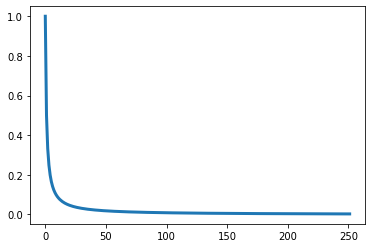

In [9]:
#note the flipping for graphing purposes only, 
#the graph should look like a probability density function
#in reality we want weights applied to returns 
#to decay as returns are older, further in the past
exp_probs = exponent_weighting(252*1)
plt.plot(np.flip(exp_probs), linewidth=3) 